<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Fermion_Creation_Annihilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp

def display_dirac_lagrangian():
    """
    Symbolically represents and prints the Dirac Lagrangian using SymPy.
    """
    # Define symbols
    psi = sp.Symbol('ψ')
    psi_bar = sp.Symbol('ψ̄')
    gamma = sp.Symbol('γ^μ')
    partial = sp.Symbol('∂_μ')
    m = sp.Symbol('m')
    i = sp.I

    # Define the kinetic and mass terms of the Lagrangian
    kinetic_term = i * psi_bar * gamma * partial * psi
    mass_term = m * psi_bar * psi

    # Construct the full Lagrangian
    lagrangian = kinetic_term - mass_term

    # Print the Lagrangian
    print("Symbolic Representation of the Dirac Lagrangian:")
    sp.pprint(lagrangian, use_unicode=True)

display_dirac_lagrangian()

Symbolic Representation of the Dirac Lagrangian:
-m⋅ψ⋅ψ̄ + ⅈ⋅γ__μ⋅ψ⋅ψ̄⋅∂_μ


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

def animate_fermion_creation_annihilation_for_colab():
    """
    Creates a conceptual animation of fermion creation and annihilation in 1D space,
    formatted for display in a Colab notebook.
    """
    fig, ax = plt.subplots()
    # This list will store the particles for the animation
    particles = []

    # This is the function that gets called for each frame of the animation
    def update(frame):
        # Clear the entire plot to redraw for the new frame
        ax.clear()
        ax.set_xlim(0, 10)
        ax.set_ylim(-1, 1)
        ax.set_yticks([])
        ax.set_xlabel("1D Space")
        ax.set_title("Conceptual Animation of Fermion Creation & Annihilation")

        # --- Particle Logic ---

        # Rule: Annihilate a pair if one exists and a random chance occurs
        if particles and np.random.rand() > 0.6:
            p_to_remove = particles.pop(0) # Remove the oldest particle pair
            pos = p_to_remove['pos']
            # Display "Annihilation" text for this frame
            ax.text(pos, 0.2, "Annihilation (ψ)", ha='center', color='purple', fontsize=12)

        # Rule: Create a new pair if there's space and a random chance occurs
        if len(particles) < 4 and np.random.rand() > 0.5:
            pos = np.random.uniform(1, 9)
            # Add a dictionary for the new pair to our list
            particles.append({'pos': pos})
            # Display "Creation" text for this frame
            ax.text(pos, 0.2, "Creation (ψ†)", ha='center', color='green', fontsize=12)


        # --- Drawing Logic ---

        # Draw all particles that are currently in the list
        current_handles = []
        for p in particles:
            pos = p['pos']
            # Draw the fermion and anti-fermion
            fermion_handle, = ax.plot(pos - 0.1, 0, 'bo', markersize=10, label='Fermion')
            anti_fermion_handle, = ax.plot(pos + 0.1, 0, 'ro', markersize=10, label='Anti-fermion')

            # Store unique handles for creating the legend
            if not any(h.get_label() == 'Fermion' for h in current_handles):
                 current_handles.append(fermion_handle)
            if not any(h.get_label() == 'Anti-fermion' for h in current_handles):
                 current_handles.append(anti_fermion_handle)


        # Create a clean legend on each frame if there are particles to label
        if current_handles:
            ax.legend(handles=current_handles, loc='upper right')


    # --- End of the 'update' function ---


    # Create the animation object by calling the 'update' function for each frame
    ani = animation.FuncAnimation(fig, update, frames=150, interval=300)

    # Close the static plot that would otherwise display
    plt.close()

    # Convert the animation to an HTML5 video and return it for display
    return HTML(ani.to_html5_video())


# Run the function to generate and display the animation in Colab
display(animate_fermion_creation_annihilation_for_colab())

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML, display # Import display for showing the HTML output

# Define constants
hbar =1.0
m =1.0
v =1.0

# Define the3D grid
x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
z = np.linspace(-10,10,10)
X, Y, Z = np.meshgrid(x, y, z)

# Define the wave function
def wave_function(X, Y, Z, t):
 # Use vectorized operations instead of iterating
 psi = np.exp(-((X**2 + Y**2 + Z**2)/10)) * np.exp(1j * t * (X + Y + Z))
 return psi

# Define the probability density
def probability_density(psi):
 return np.abs(psi)**2

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
t =0
psi = wave_function(X, Y, Z, t)
sc = ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c=probability_density(psi).ravel(), cmap='hot')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

# Animation function
def animate(t):
 ax.clear()
 psi = wave_function(X, Y, Z, t)
 sc = ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c=probability_density(psi).ravel(), cmap='hot')
 ax.set_xlim(-10,10)
 ax.set_ylim(-10,10)
 ax.set_zlim(-10,10)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0,10,100), interval=50)

# Convert the animation to HTML5 video for display in Colab
plt.close(fig) # Close the figure to prevent a static plot from displaying
html_animation = HTML(ani.to_html5_video())
display(html_animation) # Display the HTML5 video

To see the particle creation and annihilation animation again, please run the code cell with the function `animate_fermion_creation_annihilation_for_colab()`.

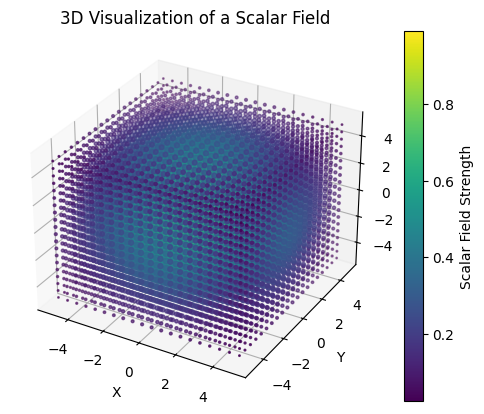

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D grid
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
z = np.linspace(-5, 5, 20)
X, Y, Z = np.meshgrid(x, y, z)

# Define a simple scalar field function (e.g., a Gaussian-like function)
def scalar_field(X, Y, Z):
    return np.exp(-(X**2 + Y**2 + Z**2) / 20.0)

# Calculate the scalar field values on the grid
field_values = scalar_field(X, Y, Z)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize the scalar field using a scatter plot, with color representing the field strength
scatter = ax.scatter(X.ravel(), Y.ravel(), Z.ravel(), c=field_values.ravel(), cmap='viridis', s=field_values.ravel() * 50)

# Add a color bar to show the mapping between color and field strength
cbar = fig.colorbar(scatter)
cbar.set_label('Scalar Field Strength')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of a Scalar Field')

plt.show()